In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px

In [111]:
stock_list=pd.read_csv("data files/stock_list.csv")
print(stock_list.shape)


#uniques in each column
stock_list.nunique()

(4417, 16)


SecuritiesCode            4417
EffectiveDate               10
Name                      4411
Section/Products            11
NewMarketSegment             6
33SectorCode                34
33SectorName                34
17SectorCode                18
17SectorName                34
NewIndexSeriesSizeCode       6
NewIndexSeriesSize           6
TradeDate                   10
Close                     2566
IssuedShares              4011
MarketCapitalization      4121
Universe0                    2
dtype: int64

In [112]:
stock_list.head()

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False
3,1308,20211230,Nikko Exchange Traded Index Fund TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2053.0,3.736943e+09,7.671945e+12,False
4,1309,20211230,NEXT FUNDS ChinaAMC SSE50 Index Exchange Trade...,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,44280.0,7.263200e+04,3.216145e+09,False


In [113]:
train_df=pd.read_csv("data files/train_files/stock_prices.csv")
train_df.shape

(2332531, 12)

In [114]:
train_df.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [115]:
print("Min and max date in the dataset",train_df.Date.min()," to ", train_df.Date.max())
train_df.describe().style.format("{:.2f}")

Min and max date in the dataset 2017-01-04  to  2021-12-03


,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,Target
count,2332531.00,2324923.00,2324923.00,2324923.00,2324923.00,2332531.00,2332531.00,18865.00,2332293.00
mean,5894.84,2594.51,2626.54,2561.23,2594.02,691936.56,1.00,22.02,0.00
std,2404.16,3577.19,3619.36,3533.49,3576.54,3911255.94,0.07,29.88,0.02
min,1301.00,14.00,15.00,13.00,14.00,0.00,0.10,0.00,-0.58
25%,3891.00,1022.00,1035.00,1009.00,1022.00,30300.00,1.00,5.00,-0.01
50%,6238.00,1812.00,1834.00,1790.00,1811.00,107100.00,1.00,15.00,0.00
75%,7965.00,3030.00,3070.00,2995.00,3030.00,402100.00,1.00,30.00,0.01
max,9997.00,109950.00,110500.00,107200.00,109550.00,643654000.00,20.00,1070.00,1.12


In [116]:
print(train_df.info())
print(train_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB
None
RowId               2332531
Date                   1202
SecuritiesCode         2000
Open                  23067
High                  23960
Low                   23904
Close                 24046
Volume                89006
AdjustmentFactor         19
ExpectedDividend        446
SupervisionFlag           2
Target               356414
dtype: int64


In [117]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), width=800))
colors=px.colors.qualitative.Plotly

train_date = train_df.Date.unique()
# Calculating the average closing price, returns and volume traded grouped by date
close_avg = train_df.groupby('Date')['Close'].mean().rename('Close Price')
returns = train_df.groupby('Date')['Target'].mean().mul(100).rename('Returns')
vol_avg = train_df.groupby('Date')['Volume'].mean().rename('Volume')

# Creating the plot

fig = make_subplots(rows=3, cols=1, 
                    shared_xaxes=True)
for i, j in enumerate([returns, close_avg, vol_avg]):
    fig.add_trace(go.Scatter(x=train_date, y=j, mode='lines',
                             name=j.name, marker_color=colors[i]), row=i+1, col=1)
fig.update_xaxes(rangeslider_visible=False,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=6, label="6m", step="month", stepmode="backward"),
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(step="all")])),
                 row=1,col=1)
fig.update_layout(template=temp,title='JPX Market Average Stock Return, Closing Price, and Shares Traded', 
                  hovermode='x unified', height=700, 
                  yaxis1=dict(title='Stock Return', ticksuffix='%'), 
                  yaxis2_title='Closing Price', yaxis3_title='Shares Traded',
                  showlegend=False)
fig.show()

In [118]:

# left join data and stock_list on SecuritiesCode column to get the 17SectorName
train_df = train_df.merge(stock_list[['SecuritiesCode', '17SectorName']], on='SecuritiesCode', how='left')


train_df['Year'] = pd.to_datetime(train_df['Date']).dt.year

# Calculate the average return by sector and year
avg_returns_by_sector = train_df.pivot_table(index='17SectorName', columns='Year', values='Target', aggfunc='mean') * 100

# Create a simple horizontal bar plot for the latest year's average return
latest_year = avg_returns_by_sector.columns[-1]
fig = go.Figure(data=[
    go.Bar(x=avg_returns_by_sector[latest_year], y=avg_returns_by_sector.index, orientation='h')
])

# Update layout of the plot
fig.update_layout(title='Average Stock Returns by Sector for {}'.format(latest_year),
                  xaxis_title='Average Return (%)',
                  yaxis_title='Sector')
fig.show()

In [128]:
#ytdata profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df, title="Pandas Profiling Report")
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/krishan/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

array([[<Axes: title={'center': 'SecuritiesCode'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>],
       [<Axes: title={'center': 'AdjustmentFactor'}>,
        <Axes: title={'center': 'ExpectedDividend'}>,
        <Axes: title={'center': 'Target'}>],
       [<Axes: title={'center': 'Year'}>, <Axes: >, <Axes: >]],
      dtype=object)

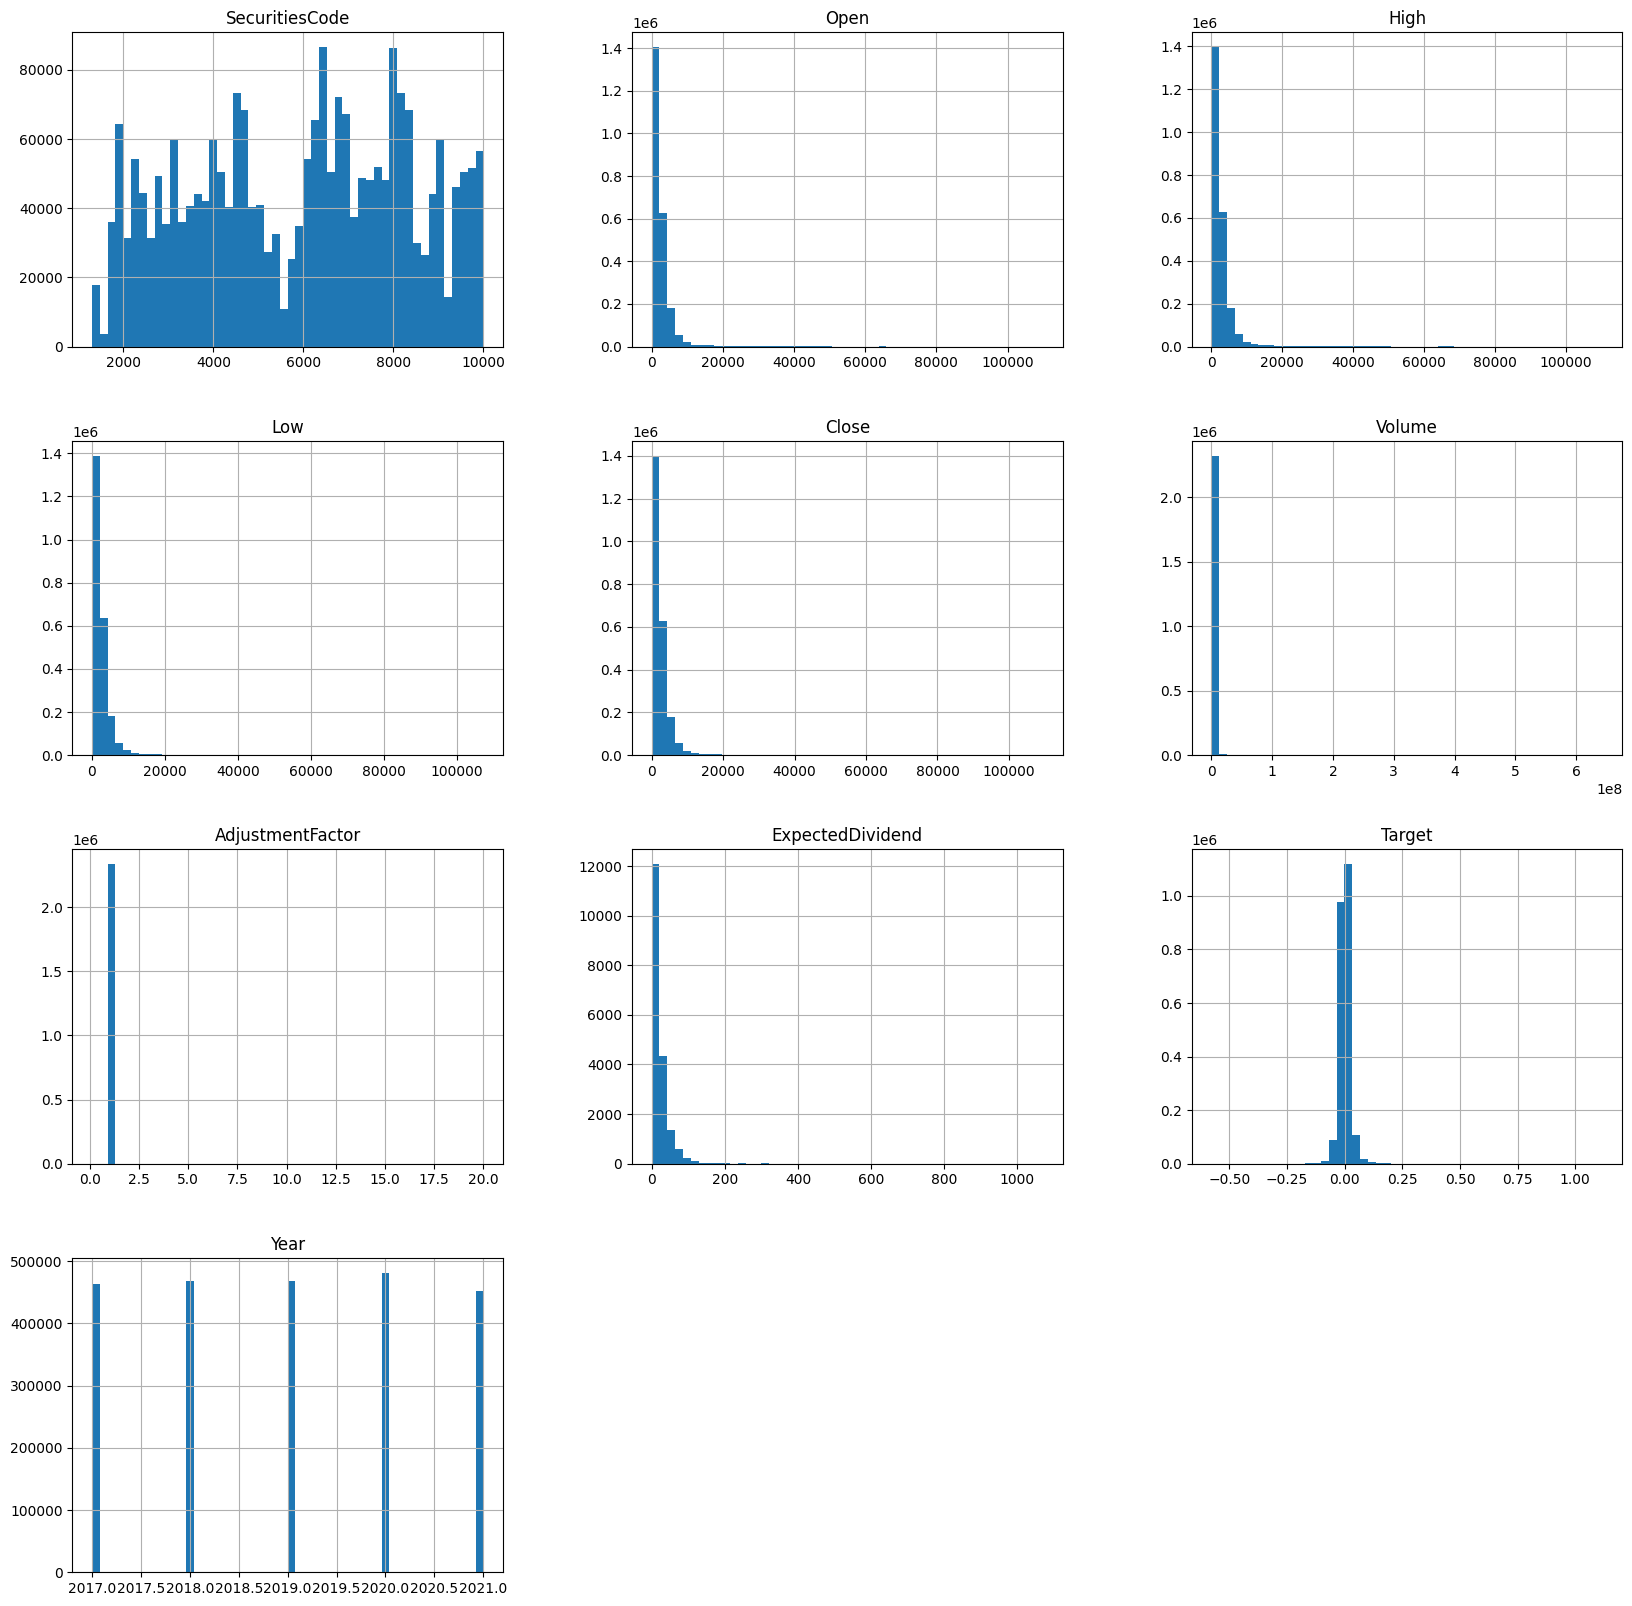

In [102]:
#plotting histogram for all the columns
train_df.hist(bins=50,figsize=(20,20))

In [103]:
#function to split the train_df into train, val and test without shuffling as this is time series train_df of stock prices
def split_train_df(train_df,train_size,val_size,test_size):
    train_end=int(train_size*len(train_df))
    val_end=int(val_size*len(train_df))
    train=train_df[:train_end]
    val=train_df[train_end:val_end]
    test=train_df[val_end:]
    return train,val,test

In [104]:
#splitting the train_df
train,val,test=split_train_df(train_df,train_size=0.8,val_size=0.1,test_size=0.1)
print("Train train_df shape",train.shape)
print("Val train_df shape",val.shape)
print("Test train_df shape",test.shape)


Train train_df shape (1866024, 14)
Val train_df shape (0, 14)
Test train_df shape (2099278, 14)


In [105]:
train_df["Volume_cat"]=pd.cut(train_df["Volume"],
                          bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,np.inf],
                          labels=[1,2,3,4,5,6,7,8,9])

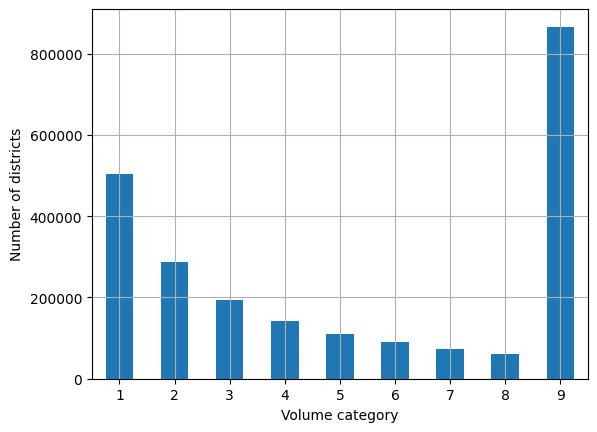

In [106]:
train_df["Volume_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Volume category")
plt.ylabel("Number of districts")
plt.show()

# Discover and Visualize the train_df to Gain Insights

<Axes: xlabel='Target', ylabel='Volume'>

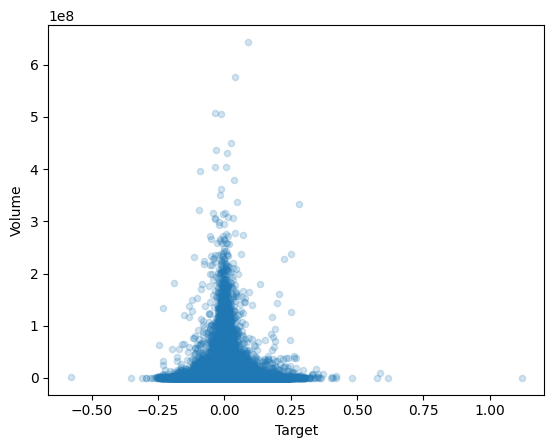

In [107]:
train_df.plot(kind="scatter",x="Target",y="Volume",alpha=0.2)

# Chekcing Correlation between attributes

/var/folders/1p/q_9hhzqs0yddpgkxqm_hvtbc0000gn/T/ipykernel_12356/1272511270.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



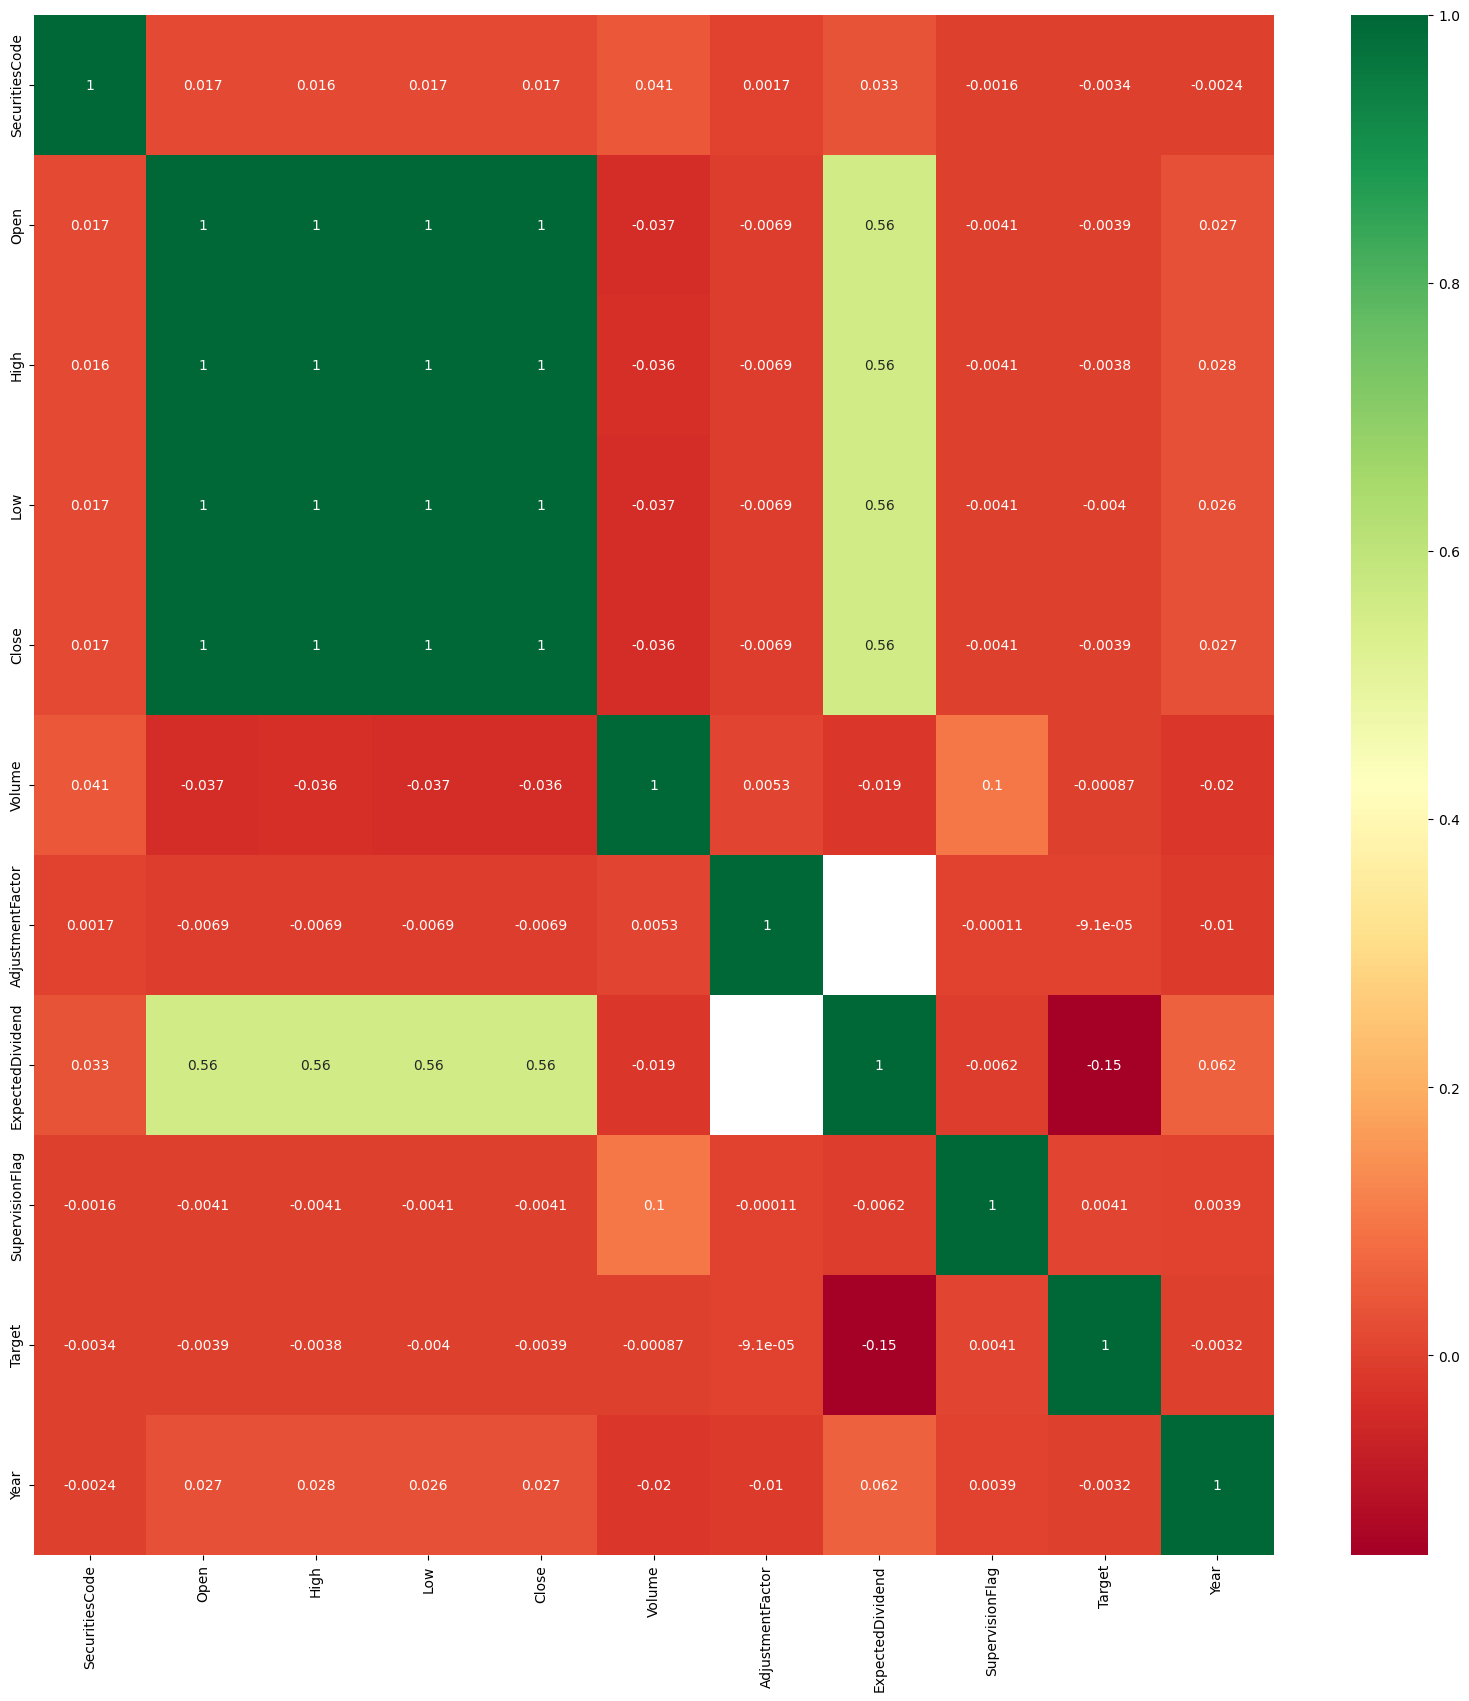

In [108]:
corr_matrix = train_df.corr(numeric_only=True)
corr_matrix["Target"].sort_values(ascending=False)

#plotting the correlation matrix
corr=train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [109]:
from pandas.plotting import scatter_matrix
attributes = ["Target", "Volume", "Open", "High"]
scatter_matrix(train_df[attributes], figsize=(12, 8))

#plotting the correlation matrix
plt.figure(figsize=(12,8))


<Figure size 1200x800 with 0 Axes>

Error in callback <function _draw_all_if_interactive at 0x16b1769d0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x297ed4b80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

# Preparing the train_df for Machine Learning Algorithms

## Transformation Pipelines

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [ ]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

In [ ]:
df_housing_num_prepared = pd.train_dfFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [ ]:
num_pipeline.steps

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

## Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

## Better evaluation using Cross-Validation

## Grid Search

## Evaluate Your System on the Test Set

## Model Persistence Using joblib